<class 'numpy.ndarray'>


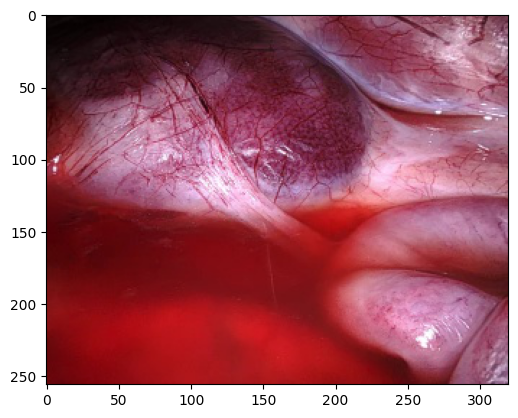

In [1]:
from endoscopycorruptions import corrupt, get_corruption_names
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

image = np.asarray(Image.open('test_image.png'))

print(type(image))
plt.imshow(image)

In [2]:
if len(image.shape) > 2 and image.shape[2] == 4:
    image = image[:, :, :3]

image.shape

(256, 320, 3)

In [3]:
get_corruption_names()

['brightness',
 'darkness',
 'contrast',
 'fog',
 'defocus_blur',
 'glass_blur',
 'motion_blur',
 'zoom_blur',
 'gaussian_noise',
 'impulse_noise',
 'shot_noise',
 'iso_noise',
 'lens_distortion',
 'resolution_change',
 'specular_reflection',
 'color_changes']

# Saving

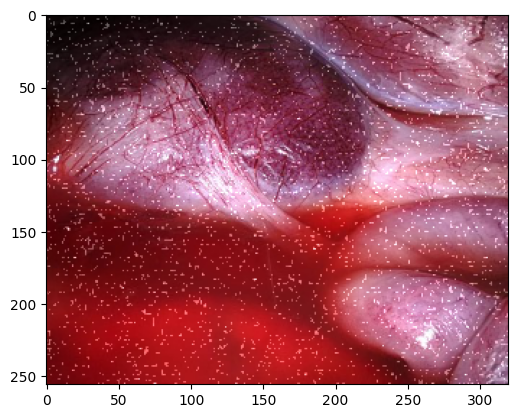

In [7]:
corrupted_image = corrupt(image, corruption_name='specular_reflection', severity=2)
plt.imshow(corrupted_image)
plt.show()


# for corruption in get_corruption_names():
#     for severity in range(5):
#         corrupted = corrupt(image, corruption_name=corruption, severity=severity+1)
#         plt.imshow(corrupted)
#         plt.axis('off')
        
#         folder_path = f"data/{corruption}/"
#         if not os.path.exists(folder_path):
#             os.makedirs(folder_path)

#         plt.savefig(f'{folder_path}/c_{corruption}_sev{severity + 1}.png', bbox_inches='tight')
#         # plt.show()
#     print(corruption)

# Plotting

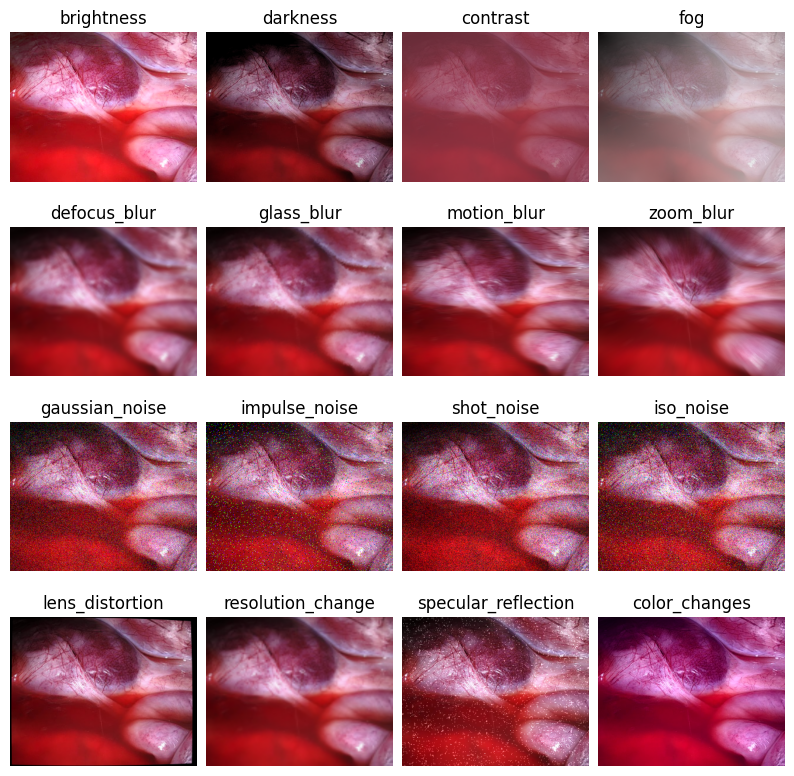

In [12]:
images = []
names = get_corruption_names()
for corruption in get_corruption_names():
    for severity in range(1,2):
        images.append(corrupt(image, corruption_name=corruption, severity=severity+1))


fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for ax, img, name in zip(axes.flat, images, names):
    ax.imshow(img, cmap='gray')
    ax.set_title(name)
    ax.axis('off') 

plt.subplots_adjust(wspace=0.05, hspace=0.05)  # Adjust space between images
plt.show()